In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import normal as rnorm, seed
from matplotlib.colors import ListedColormap

In [17]:
from sklearn.model_selection import train_test_split

plt.rcParams['font.size'] = 16

def plot_result(clf, clf_name, df, color=True):
    X = df[['x', 'y']]
    Y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.4, random_state=40)
    n_classes = len(Y.unique())
    cm = plt.cm.RdBu
    plot_colors = 'rbym'
    plot_markers = 'o^v*'
    plot_step = 0.02
    
    x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
    y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cm, alpha=.5)
    
    for i, color, m in zip(range(n_classes), plot_colors, plot_markers):
        plt.scatter(X[Y==i].x, X[Y==i].y, c=color, label=i, cmap=cm, marker=m, s=80)
        
    plt.text(xx.max() - .3, yy.min() + .3, '{}'.format(score).lstrip('0'), size=15, horizontalalignment='right')
    plt.title(clf_name)

In [22]:
seed(100)

N = 50
p1 = pd.DataFrame(rnorm(loc=2.0, scale=0.5, size=(N, 2)),
                 columns=['x', 'y'])
p1['label'] = 0
p2 = pd.DataFrame(rnorm(loc=1.0, scale=0.5, size=(N, 2)), columns=['x', 'y'])
p2['label'] = 1
df = pd.concat([p1, p2])
df.head()

,x,y,label
0,1.125117,2.171340,0
1,2.576518,1.873782,0
2,2.490660,2.257109,0
3,2.110590,1.464978,0
4,1.905252,2.127501,0


In [23]:
N = 50
p1 = pd.DataFrame(np.hstack((rnorm(loc=1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p1['label'] = 0
p2 = pd.DataFrame(np.hstack((rnorm(loc=-1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p2['label'] = 1
p3 = pd.DataFrame(np.hstack((rnorm(loc=-1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=-1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p3['label'] = 0
p4 = pd.DataFrame(np.hstack((rnorm(loc=1.0, scale=1.0, size=(N,1)), 
                              rnorm(loc=-1.0, scale=1.0, size=(N,1)))),
                   columns=['x','y'])
p4['label'] = 1
df_xor = pd.concat([p1,p2,p3,p4])

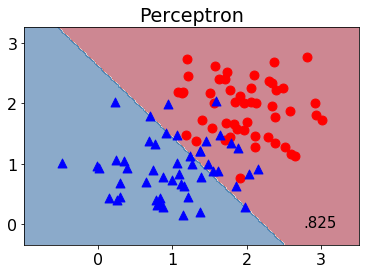

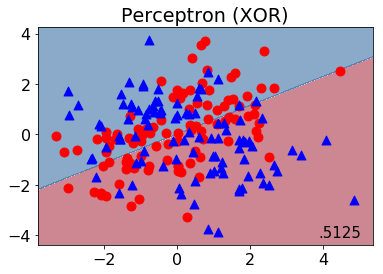

In [24]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=1000)

plot_result(clf, 'Perceptron', df)
plt.show()
plot_result(clf, 'Perceptron (XOR)', df_xor)

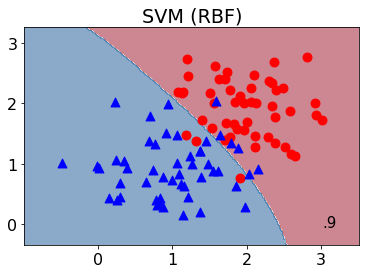

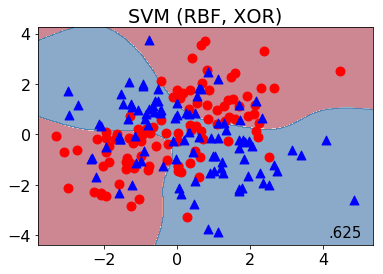

In [26]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf')
plot_result(clf, 'SVM (RBF)', df)
plt.show()
plot_result(clf, 'SVM (RBF, XOR)', df_xor)

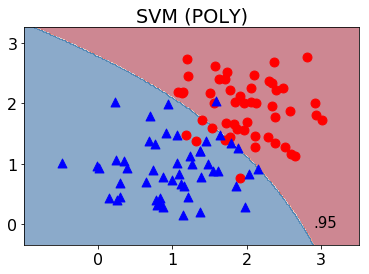

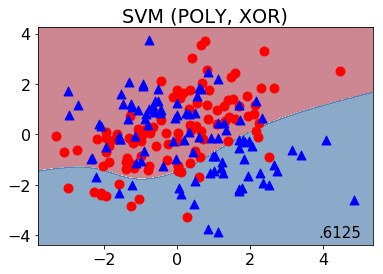

In [27]:
clf = SVC(kernel='poly')
plot_result(clf, 'SVM (POLY)', df)
plt.show()
plot_result(clf, 'SVM (POLY, XOR)', df_xor)

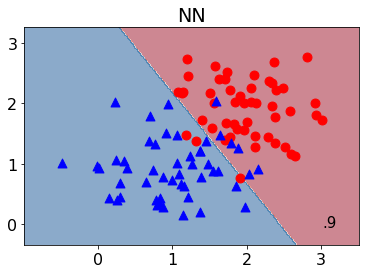

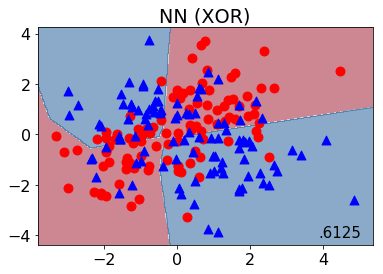

In [31]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=0.01, hidden_layer_sizes=(5, 2), random_state=1,
                   max_iter=2000)
plot_result(clf, 'NN', df)
plt.show()
plot_result(clf, 'NN (XOR)', df_xor)

In [ ]:
import tensorflow as tf
from tensorflow.contrib import learn
feature_columns = [tf.contrib.layers.real_valued_column('', dimension=2)]
clf = learn.LinearClassifier(feature_columns=feature_columns)
plot_result(clf, 'NN', df)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3530f65588>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpejk4b64p'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpejk4b64p/model.ckpt.
INFO:tensorflow:loss = 0.693147, step = 1
INFO:tensorflow:global_step/sec: 526.011

INFO:tensorflow:loss = 0.18805, step = 7201 (0.219 sec)
INFO:tensorflow:global_step/sec: 514.379
INFO:tensorflow:loss = 0.188008, step = 7301 (0.194 sec)
INFO:tensorflow:global_step/sec: 548.033
INFO:tensorflow:loss = 0.187968, step = 7401 (0.182 sec)
INFO:tensorflow:global_step/sec: 513.134
INFO:tensorflow:loss = 0.18793, step = 7501 (0.195 sec)
INFO:tensorflow:global_step/sec: 430.258
INFO:tensorflow:loss = 0.187893, step = 7601 (0.234 sec)
INFO:tensorflow:global_step/sec: 408.575
INFO:tensorflow:loss = 0.187858, step = 7701 (0.244 sec)
INFO:tensorflow:global_step/sec: 628.88
INFO:tensorflow:loss = 0.187824, step = 7801 (0.158 sec)
INFO:tensorflow:global_step/sec: 515.545
INFO:tensorflow:loss = 0.187792, step = 7901 (0.194 sec)
INFO:tensorflow:global_step/sec: 519.415
INFO:tensorflow:loss = 0.187761, step = 8001 (0.193 sec)
INFO:tensorflow:global_step/sec: 529.162
INFO:tensorflow:loss = 0.187732, step = 8101 (0.189 sec)
INFO:tensorflow:global_step/sec: 628.923
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 639.878
INFO:tensorflow:loss = 0.187055, step = 15601 (0.156 sec)
INFO:tensorflow:global_step/sec: 615.78
INFO:tensorflow:loss = 0.187053, step = 15701 (0.162 sec)
INFO:tensorflow:global_step/sec: 640.223
INFO:tensorflow:loss = 0.187052, step = 15801 (0.156 sec)
INFO:tensorflow:global_step/sec: 613.88
INFO:tensorflow:loss = 0.18705, step = 15901 (0.163 sec)
INFO:tensorflow:global_step/sec: 635.779
INFO:tensorflow:loss = 0.187049, step = 16001 (0.160 sec)
INFO:tensorflow:global_step/sec: 656.925
INFO:tensorflow:loss = 0.187048, step = 16101 (0.150 sec)
INFO:tensorflow:global_step/sec: 631.571
INFO:tensorflow:loss = 0.187046, step = 16201 (0.158 sec)
INFO:tensorflow:global_step/sec: 643.131
INFO:tensorflow:loss = 0.187045, step = 16301 (0.155 sec)
INFO:tensorflow:global_step/sec: 672.078
INFO:tensorflow:loss = 0.187044, step = 16401 (0.149 sec)
INFO:tensorflow:global_step/sec: 618.165
INFO:tensorflow:loss = 0.187043, step = 16501 (0.161 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 635.834
INFO:tensorflow:loss = 0.187013, step = 23901 (0.157 sec)
INFO:tensorflow:global_step/sec: 618.396
INFO:tensorflow:loss = 0.187013, step = 24001 (0.162 sec)
INFO:tensorflow:global_step/sec: 630.036
INFO:tensorflow:loss = 0.187013, step = 24101 (0.159 sec)
INFO:tensorflow:global_step/sec: 629.091
INFO:tensorflow:loss = 0.187013, step = 24201 (0.159 sec)
INFO:tensorflow:global_step/sec: 662.557
INFO:tensorflow:loss = 0.187012, step = 24301 (0.151 sec)
INFO:tensorflow:global_step/sec: 644.96
INFO:tensorflow:loss = 0.187012, step = 24401 (0.155 sec)
INFO:tensorflow:global_step/sec: 632.585
INFO:tensorflow:loss = 0.187012, step = 24501 (0.158 sec)
INFO:tensorflow:global_step/sec: 631.108
INFO:tensorflow:loss = 0.187012, step = 24601 (0.159 sec)
INFO:tensorflow:global_step/sec: 644.431
INFO:tensorflow:loss = 0.187012, step = 24701 (0.155 sec)
INFO:tensorflow:global_step/sec: 546.316
INFO:tensorflow:loss = 0.187012, step = 24801 (0.183 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 402.626
INFO:tensorflow:loss = 0.18701, step = 32201 (0.248 sec)
INFO:tensorflow:global_step/sec: 548.018
INFO:tensorflow:loss = 0.18701, step = 32301 (0.182 sec)
INFO:tensorflow:global_step/sec: 598.768
INFO:tensorflow:loss = 0.18701, step = 32401 (0.167 sec)
INFO:tensorflow:global_step/sec: 595.315
INFO:tensorflow:loss = 0.18701, step = 32501 (0.168 sec)
INFO:tensorflow:global_step/sec: 647.756
INFO:tensorflow:loss = 0.18701, step = 32601 (0.154 sec)
INFO:tensorflow:global_step/sec: 664.337
INFO:tensorflow:loss = 0.18701, step = 32701 (0.150 sec)
INFO:tensorflow:global_step/sec: 623.686
INFO:tensorflow:loss = 0.18701, step = 32801 (0.161 sec)
INFO:tensorflow:global_step/sec: 630.613
INFO:tensorflow:loss = 0.18701, step = 32901 (0.159 sec)
INFO:tensorflow:global_step/sec: 640.439
INFO:tensorflow:loss = 0.18701, step = 33001 (0.156 sec)
INFO:tensorflow:global_step/sec: 648.97
INFO:tensorflow:loss = 0.18701, step = 33101 (0.154 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 562.046
INFO:tensorflow:loss = 0.18701, step = 40601 (0.178 sec)
INFO:tensorflow:global_step/sec: 477.544
INFO:tensorflow:loss = 0.18701, step = 40701 (0.210 sec)
INFO:tensorflow:global_step/sec: 529.433
INFO:tensorflow:loss = 0.18701, step = 40801 (0.188 sec)
INFO:tensorflow:global_step/sec: 600.687
INFO:tensorflow:loss = 0.18701, step = 40901 (0.167 sec)
INFO:tensorflow:global_step/sec: 593.878
INFO:tensorflow:loss = 0.18701, step = 41001 (0.168 sec)
INFO:tensorflow:global_step/sec: 603.983
INFO:tensorflow:loss = 0.18701, step = 41101 (0.166 sec)
INFO:tensorflow:global_step/sec: 678.53
INFO:tensorflow:loss = 0.18701, step = 41201 (0.147 sec)
INFO:tensorflow:global_step/sec: 592.223
INFO:tensorflow:loss = 0.18701, step = 41301 (0.169 sec)
INFO:tensorflow:global_step/sec: 531.289
INFO:tensorflow:loss = 0.18701, step = 41401 (0.188 sec)
INFO:tensorflow:global_step/sec: 616.643
INFO:tensorflow:loss = 0.18701, step = 41501 (0.162 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 643.982
INFO:tensorflow:loss = 0.18701, step = 49001 (0.155 sec)
INFO:tensorflow:global_step/sec: 648.897
INFO:tensorflow:loss = 0.18701, step = 49101 (0.154 sec)
INFO:tensorflow:global_step/sec: 532.458
INFO:tensorflow:loss = 0.18701, step = 49201 (0.188 sec)
INFO:tensorflow:global_step/sec: 551.715
INFO:tensorflow:loss = 0.18701, step = 49301 (0.181 sec)
INFO:tensorflow:global_step/sec: 468.659
INFO:tensorflow:loss = 0.18701, step = 49401 (0.214 sec)
INFO:tensorflow:global_step/sec: 563.235
INFO:tensorflow:loss = 0.18701, step = 49501 (0.177 sec)
INFO:tensorflow:global_step/sec: 637.193
INFO:tensorflow:loss = 0.18701, step = 49601 (0.158 sec)
INFO:tensorflow:global_step/sec: 646.811
INFO:tensorflow:loss = 0.18701, step = 49701 (0.154 sec)
INFO:tensorflow:global_step/sec: 641.194
INFO:tensorflow:loss = 0.18701, step = 49801 (0.156 sec)
INFO:tensorflow:global_step/sec: 620.631
INFO:tensorflow:loss = 0.18701, step = 49901 (0.161 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 663.538
INFO:tensorflow:loss = 0.18701, step = 57401 (0.151 sec)
INFO:tensorflow:global_step/sec: 675.031
INFO:tensorflow:loss = 0.18701, step = 57501 (0.148 sec)
INFO:tensorflow:global_step/sec: 675.118
INFO:tensorflow:loss = 0.18701, step = 57601 (0.148 sec)
INFO:tensorflow:global_step/sec: 568.691
INFO:tensorflow:loss = 0.18701, step = 57701 (0.176 sec)
INFO:tensorflow:global_step/sec: 563.969
INFO:tensorflow:loss = 0.18701, step = 57801 (0.178 sec)
INFO:tensorflow:global_step/sec: 686.717
INFO:tensorflow:loss = 0.18701, step = 57901 (0.145 sec)
INFO:tensorflow:global_step/sec: 613.725
INFO:tensorflow:loss = 0.18701, step = 58001 (0.163 sec)
INFO:tensorflow:global_step/sec: 596.346
INFO:tensorflow:loss = 0.18701, step = 58101 (0.171 sec)
INFO:tensorflow:global_step/sec: 559.936
INFO:tensorflow:loss = 0.18701, step = 58201 (0.179 sec)
INFO:tensorflow:global_step/sec: 404.654
INFO:tensorflow:loss = 0.18701, step = 58301 (0.248 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 648.878
INFO:tensorflow:loss = 0.18701, step = 65801 (0.154 sec)
INFO:tensorflow:global_step/sec: 635.72
INFO:tensorflow:loss = 0.18701, step = 65901 (0.157 sec)
INFO:tensorflow:global_step/sec: 630.878
INFO:tensorflow:loss = 0.18701, step = 66001 (0.159 sec)
INFO:tensorflow:global_step/sec: 619.45
INFO:tensorflow:loss = 0.18701, step = 66101 (0.162 sec)
INFO:tensorflow:global_step/sec: 648.037
INFO:tensorflow:loss = 0.18701, step = 66201 (0.154 sec)
INFO:tensorflow:global_step/sec: 468.837
INFO:tensorflow:loss = 0.18701, step = 66301 (0.213 sec)
INFO:tensorflow:global_step/sec: 521.386
INFO:tensorflow:loss = 0.18701, step = 66401 (0.192 sec)
INFO:tensorflow:global_step/sec: 599.537
INFO:tensorflow:loss = 0.18701, step = 66501 (0.167 sec)
INFO:tensorflow:global_step/sec: 605.232
INFO:tensorflow:loss = 0.18701, step = 66601 (0.165 sec)
INFO:tensorflow:global_step/sec: 464.053
INFO:tensorflow:loss = 0.18701, step = 66701 (0.215 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 664.556
INFO:tensorflow:loss = 0.18701, step = 74201 (0.150 sec)
INFO:tensorflow:global_step/sec: 671.064
INFO:tensorflow:loss = 0.18701, step = 74301 (0.149 sec)
INFO:tensorflow:global_step/sec: 467.585
INFO:tensorflow:loss = 0.18701, step = 74401 (0.214 sec)
INFO:tensorflow:global_step/sec: 596.915
INFO:tensorflow:loss = 0.18701, step = 74501 (0.167 sec)
INFO:tensorflow:global_step/sec: 455.451
INFO:tensorflow:loss = 0.18701, step = 74601 (0.220 sec)
INFO:tensorflow:global_step/sec: 609.585
INFO:tensorflow:loss = 0.18701, step = 74701 (0.164 sec)
INFO:tensorflow:global_step/sec: 660.077
INFO:tensorflow:loss = 0.18701, step = 74801 (0.152 sec)
INFO:tensorflow:global_step/sec: 499.66
INFO:tensorflow:loss = 0.18701, step = 74901 (0.200 sec)
INFO:tensorflow:global_step/sec: 512.187
INFO:tensorflow:loss = 0.18701, step = 75001 (0.195 sec)
INFO:tensorflow:global_step/sec: 595.237
INFO:tensorflow:loss = 0.18701, step = 75101 (0.168 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 624.777
INFO:tensorflow:loss = 0.18701, step = 82601 (0.162 sec)
INFO:tensorflow:global_step/sec: 602.038
INFO:tensorflow:loss = 0.18701, step = 82701 (0.165 sec)
INFO:tensorflow:global_step/sec: 621.306
INFO:tensorflow:loss = 0.18701, step = 82801 (0.159 sec)
INFO:tensorflow:global_step/sec: 579.58
INFO:tensorflow:loss = 0.18701, step = 82901 (0.173 sec)
INFO:tensorflow:global_step/sec: 629.881
INFO:tensorflow:loss = 0.18701, step = 83001 (0.159 sec)
INFO:tensorflow:global_step/sec: 628.568
INFO:tensorflow:loss = 0.18701, step = 83101 (0.159 sec)
INFO:tensorflow:global_step/sec: 594.698
INFO:tensorflow:loss = 0.18701, step = 83201 (0.168 sec)
INFO:tensorflow:global_step/sec: 637.257
INFO:tensorflow:loss = 0.18701, step = 83301 (0.157 sec)
INFO:tensorflow:global_step/sec: 647.437
INFO:tensorflow:loss = 0.18701, step = 83401 (0.154 sec)
INFO:tensorflow:global_step/sec: 613.464
INFO:tensorflow:loss = 0.18701, step = 83501 (0.163 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 551.893
INFO:tensorflow:loss = 0.18701, step = 91001 (0.181 sec)
INFO:tensorflow:global_step/sec: 612.156
INFO:tensorflow:loss = 0.18701, step = 91101 (0.164 sec)
INFO:tensorflow:global_step/sec: 609.609
INFO:tensorflow:loss = 0.18701, step = 91201 (0.164 sec)
INFO:tensorflow:global_step/sec: 596.787
INFO:tensorflow:loss = 0.18701, step = 91301 (0.168 sec)
INFO:tensorflow:global_step/sec: 624.428
INFO:tensorflow:loss = 0.18701, step = 91401 (0.160 sec)
INFO:tensorflow:global_step/sec: 582.719
INFO:tensorflow:loss = 0.18701, step = 91501 (0.171 sec)
INFO:tensorflow:global_step/sec: 594.955
INFO:tensorflow:loss = 0.18701, step = 91601 (0.168 sec)
INFO:tensorflow:global_step/sec: 613.336
INFO:tensorflow:loss = 0.18701, step = 91701 (0.163 sec)
INFO:tensorflow:global_step/sec: 634.728
INFO:tensorflow:loss = 0.18701, step = 91801 (0.159 sec)
INFO:tensorflow:global_step/sec: 593.483
INFO:tensorflow:loss = 0.18701, step = 91901 (0.167 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 593.91
INFO:tensorflow:loss = 0.18701, step = 99401 (0.168 sec)
INFO:tensorflow:global_step/sec: 571.321
INFO:tensorflow:loss = 0.18701, step = 99501 (0.175 sec)
INFO:tensorflow:global_step/sec: 617.031
INFO:tensorflow:loss = 0.18701, step = 99601 (0.162 sec)
INFO:tensorflow:global_step/sec: 598.893
INFO:tensorflow:loss = 0.18701, step = 99701 (0.168 sec)
INFO:tensorflow:global_step/sec: 596.708
INFO:tensorflow:loss = 0.18701, step = 99801 (0.166 sec)
INFO:tensorflow:global_step/sec: 581.946
INFO:tensorflow:loss = 0.18701, step = 99901 (0.172 sec)
INFO:tensorflow:global_step/sec: 575.576
INFO:tensorflow:loss = 0.18701, step = 100001 (0.174 sec)
INFO:tensorflow:global_step/sec: 605.432
INFO:tensorflow:loss = 0.18701, step = 100101 (0.166 sec)
INFO:tensorflow:global_step/sec: 461.269
INFO:tensorflow:loss = 0.18701, step = 100201 (0.217 sec)
INFO:tensorflow:global_step/sec: 399.197
INFO:tensorflow:loss = 0.18701, step = 100301 (0.250 sec)
INFO:tensorflow:g

INFO:tensorflow:global_step/sec: 543.454
INFO:tensorflow:loss = 0.18701, step = 107701 (0.184 sec)
INFO:tensorflow:global_step/sec: 603.952
INFO:tensorflow:loss = 0.18701, step = 107801 (0.166 sec)
INFO:tensorflow:global_step/sec: 637.149
INFO:tensorflow:loss = 0.18701, step = 107901 (0.157 sec)
INFO:tensorflow:global_step/sec: 606.131
INFO:tensorflow:loss = 0.18701, step = 108001 (0.165 sec)
INFO:tensorflow:global_step/sec: 642.973
INFO:tensorflow:loss = 0.18701, step = 108101 (0.156 sec)
INFO:tensorflow:global_step/sec: 617.113
INFO:tensorflow:loss = 0.18701, step = 108201 (0.162 sec)
INFO:tensorflow:global_step/sec: 624.061
INFO:tensorflow:loss = 0.18701, step = 108301 (0.160 sec)
INFO:tensorflow:global_step/sec: 654.346
INFO:tensorflow:loss = 0.18701, step = 108401 (0.153 sec)
INFO:tensorflow:global_step/sec: 650.334
INFO:tensorflow:loss = 0.18701, step = 108501 (0.154 sec)
INFO:tensorflow:global_step/sec: 639.604
INFO:tensorflow:loss = 0.18701, step = 108601 (0.156 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 517.154
INFO:tensorflow:loss = 0.18701, step = 116001 (0.193 sec)
INFO:tensorflow:global_step/sec: 583.133
INFO:tensorflow:loss = 0.18701, step = 116101 (0.172 sec)
INFO:tensorflow:global_step/sec: 528.517
INFO:tensorflow:loss = 0.18701, step = 116201 (0.189 sec)
INFO:tensorflow:global_step/sec: 537.764
INFO:tensorflow:loss = 0.18701, step = 116301 (0.186 sec)
INFO:tensorflow:global_step/sec: 551.54
INFO:tensorflow:loss = 0.18701, step = 116401 (0.184 sec)
INFO:tensorflow:global_step/sec: 579.174
INFO:tensorflow:loss = 0.18701, step = 116501 (0.172 sec)
INFO:tensorflow:global_step/sec: 531.078
INFO:tensorflow:loss = 0.18701, step = 116601 (0.186 sec)
INFO:tensorflow:global_step/sec: 455.382
INFO:tensorflow:loss = 0.18701, step = 116701 (0.220 sec)
INFO:tensorflow:global_step/sec: 467.567
INFO:tensorflow:loss = 0.18701, step = 116801 (0.213 sec)
INFO:tensorflow:global_step/sec: 501.772
INFO:tensorflow:loss = 0.18701, step = 116901 (0.199 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 407.189
INFO:tensorflow:loss = 0.18701, step = 124301 (0.246 sec)
INFO:tensorflow:global_step/sec: 490.064
INFO:tensorflow:loss = 0.18701, step = 124401 (0.204 sec)
INFO:tensorflow:global_step/sec: 559.267
INFO:tensorflow:loss = 0.18701, step = 124501 (0.179 sec)
INFO:tensorflow:global_step/sec: 594.218
INFO:tensorflow:loss = 0.18701, step = 124601 (0.168 sec)
INFO:tensorflow:global_step/sec: 595.155
INFO:tensorflow:loss = 0.18701, step = 124701 (0.168 sec)
INFO:tensorflow:global_step/sec: 603.473
INFO:tensorflow:loss = 0.18701, step = 124801 (0.166 sec)
INFO:tensorflow:global_step/sec: 607.419
INFO:tensorflow:loss = 0.18701, step = 124901 (0.165 sec)
INFO:tensorflow:global_step/sec: 540.772
INFO:tensorflow:loss = 0.18701, step = 125001 (0.185 sec)
INFO:tensorflow:global_step/sec: 622.485
INFO:tensorflow:loss = 0.18701, step = 125101 (0.161 sec)
INFO:tensorflow:global_step/sec: 611.13
INFO:tensorflow:loss = 0.18701, step = 125201 (0.164 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 614.871
INFO:tensorflow:loss = 0.18701, step = 132601 (0.162 sec)
INFO:tensorflow:global_step/sec: 424.453
INFO:tensorflow:loss = 0.18701, step = 132701 (0.237 sec)
INFO:tensorflow:global_step/sec: 473.72
INFO:tensorflow:loss = 0.18701, step = 132801 (0.210 sec)
INFO:tensorflow:global_step/sec: 560.787
INFO:tensorflow:loss = 0.18701, step = 132901 (0.178 sec)
INFO:tensorflow:global_step/sec: 520.482
INFO:tensorflow:loss = 0.18701, step = 133001 (0.193 sec)
INFO:tensorflow:global_step/sec: 546.709
INFO:tensorflow:loss = 0.18701, step = 133101 (0.182 sec)
INFO:tensorflow:global_step/sec: 537.153
INFO:tensorflow:loss = 0.18701, step = 133201 (0.186 sec)
INFO:tensorflow:global_step/sec: 535.048
INFO:tensorflow:loss = 0.18701, step = 133301 (0.187 sec)
INFO:tensorflow:global_step/sec: 483.724
INFO:tensorflow:loss = 0.18701, step = 133401 (0.207 sec)
INFO:tensorflow:global_step/sec: 594.989
INFO:tensorflow:loss = 0.18701, step = 133501 (0.168 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 528.905
INFO:tensorflow:loss = 0.18701, step = 140901 (0.189 sec)
INFO:tensorflow:global_step/sec: 481.634
INFO:tensorflow:loss = 0.18701, step = 141001 (0.208 sec)
INFO:tensorflow:global_step/sec: 592.587
INFO:tensorflow:loss = 0.18701, step = 141101 (0.169 sec)
INFO:tensorflow:global_step/sec: 526.326
INFO:tensorflow:loss = 0.18701, step = 141201 (0.191 sec)
INFO:tensorflow:global_step/sec: 508.019
INFO:tensorflow:loss = 0.18701, step = 141301 (0.196 sec)
INFO:tensorflow:global_step/sec: 494.873
INFO:tensorflow:loss = 0.18701, step = 141401 (0.203 sec)
INFO:tensorflow:global_step/sec: 406.304
INFO:tensorflow:loss = 0.18701, step = 141501 (0.245 sec)
INFO:tensorflow:global_step/sec: 390.005
INFO:tensorflow:loss = 0.18701, step = 141601 (0.257 sec)
INFO:tensorflow:global_step/sec: 494.102
INFO:tensorflow:loss = 0.18701, step = 141701 (0.202 sec)
INFO:tensorflow:global_step/sec: 483.517
INFO:tensorflow:loss = 0.18701, step = 141801 (0.207 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 624.063
INFO:tensorflow:loss = 0.18701, step = 149201 (0.160 sec)
INFO:tensorflow:global_step/sec: 625.718
INFO:tensorflow:loss = 0.18701, step = 149301 (0.160 sec)
INFO:tensorflow:global_step/sec: 587.883
INFO:tensorflow:loss = 0.18701, step = 149401 (0.170 sec)
INFO:tensorflow:global_step/sec: 280.203
INFO:tensorflow:loss = 0.18701, step = 149501 (0.357 sec)
INFO:tensorflow:global_step/sec: 382.693
INFO:tensorflow:loss = 0.18701, step = 149601 (0.282 sec)
INFO:tensorflow:global_step/sec: 387.18
INFO:tensorflow:loss = 0.18701, step = 149701 (0.239 sec)
INFO:tensorflow:global_step/sec: 625.937
INFO:tensorflow:loss = 0.18701, step = 149801 (0.158 sec)
INFO:tensorflow:global_step/sec: 417.689
INFO:tensorflow:loss = 0.18701, step = 149901 (0.241 sec)
INFO:tensorflow:global_step/sec: 601.093
INFO:tensorflow:loss = 0.18701, step = 150001 (0.167 sec)
INFO:tensorflow:global_step/sec: 377.271
INFO:tensorflow:loss = 0.18701, step = 150101 (0.264 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 557.232
INFO:tensorflow:loss = 0.18701, step = 157501 (0.180 sec)
INFO:tensorflow:global_step/sec: 600.105
INFO:tensorflow:loss = 0.18701, step = 157601 (0.166 sec)
INFO:tensorflow:global_step/sec: 523.683
INFO:tensorflow:loss = 0.18701, step = 157701 (0.191 sec)
INFO:tensorflow:global_step/sec: 566.111
INFO:tensorflow:loss = 0.18701, step = 157801 (0.176 sec)
INFO:tensorflow:global_step/sec: 612.104
INFO:tensorflow:loss = 0.18701, step = 157901 (0.163 sec)
INFO:tensorflow:global_step/sec: 627.803
INFO:tensorflow:loss = 0.18701, step = 158001 (0.159 sec)
INFO:tensorflow:global_step/sec: 616.413
INFO:tensorflow:loss = 0.18701, step = 158101 (0.162 sec)
INFO:tensorflow:global_step/sec: 628.992
INFO:tensorflow:loss = 0.18701, step = 158201 (0.159 sec)
INFO:tensorflow:global_step/sec: 623.301
INFO:tensorflow:loss = 0.18701, step = 158301 (0.160 sec)
INFO:tensorflow:global_step/sec: 620.574
INFO:tensorflow:loss = 0.18701, step = 158401 (0.161 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 425.773
INFO:tensorflow:loss = 0.18701, step = 165801 (0.235 sec)
INFO:tensorflow:global_step/sec: 449.291
INFO:tensorflow:loss = 0.18701, step = 165901 (0.221 sec)
INFO:tensorflow:global_step/sec: 468.011
INFO:tensorflow:loss = 0.18701, step = 166001 (0.212 sec)
INFO:tensorflow:global_step/sec: 581.799
INFO:tensorflow:loss = 0.18701, step = 166101 (0.172 sec)
INFO:tensorflow:global_step/sec: 613.726
INFO:tensorflow:loss = 0.18701, step = 166201 (0.163 sec)
INFO:tensorflow:global_step/sec: 590.936
INFO:tensorflow:loss = 0.18701, step = 166301 (0.170 sec)
INFO:tensorflow:global_step/sec: 590.893
INFO:tensorflow:loss = 0.18701, step = 166401 (0.169 sec)
INFO:tensorflow:global_step/sec: 281.288
INFO:tensorflow:loss = 0.18701, step = 166501 (0.356 sec)
INFO:tensorflow:global_step/sec: 450.572
INFO:tensorflow:loss = 0.18701, step = 166601 (0.221 sec)
INFO:tensorflow:global_step/sec: 430.56
INFO:tensorflow:loss = 0.18701, step = 166701 (0.233 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 593.522
INFO:tensorflow:loss = 0.18701, step = 174101 (0.169 sec)
INFO:tensorflow:global_step/sec: 596.971
INFO:tensorflow:loss = 0.18701, step = 174201 (0.167 sec)
INFO:tensorflow:global_step/sec: 556.035
INFO:tensorflow:loss = 0.18701, step = 174301 (0.180 sec)
INFO:tensorflow:global_step/sec: 597.323
INFO:tensorflow:loss = 0.18701, step = 174401 (0.167 sec)
INFO:tensorflow:global_step/sec: 604.91
INFO:tensorflow:loss = 0.18701, step = 174501 (0.166 sec)
INFO:tensorflow:global_step/sec: 621.931
INFO:tensorflow:loss = 0.18701, step = 174601 (0.161 sec)
INFO:tensorflow:global_step/sec: 597.634
INFO:tensorflow:loss = 0.18701, step = 174701 (0.167 sec)
INFO:tensorflow:global_step/sec: 606.343
INFO:tensorflow:loss = 0.18701, step = 174801 (0.165 sec)
INFO:tensorflow:global_step/sec: 572.192
INFO:tensorflow:loss = 0.18701, step = 174901 (0.175 sec)
INFO:tensorflow:global_step/sec: 557.652
INFO:tensorflow:loss = 0.18701, step = 175001 (0.179 sec)
INFO:tensor